# Neural Networks

This Jupyter Notebook is dedicated to understanding and implementing dense neural networks for soccer data. You can find the dataset [2022-2023 Soccer Player Stats Dataset](https://www.kaggle.com/datasets/vivovinco/20222023-football-player-stats?resource=download).

The following packages are required to run the attached code:

- [Math](https://docs.python.org/3/library/math.html)

- [Matplotlib.pylab](https://matplotlib.org/2.0.2/api/pyplot_api.html)

- [Numpy](https://numpy.org/doc/)

- [Seaborn](https://seaborn.pydata.org/)

- [Pandas](https://pandas.pydata.org/docs/)

- [TensorFlow](https://www.tensorflow.org/)

- [SciKit Learn](https://scikit-learn.org/stable/)

## Description of the Algorithm:

***
**What Are Neural Networks**:
- Neural networks, drawing inspiration from the human brain, are computational models comprising layers of interconnected neurons.
- Mathematically, neural networks are computational graphs composed of an input layer, which is followed by a sequence of hidden layers of neurons, followed by an output layer.

Here's an example of a neural network:

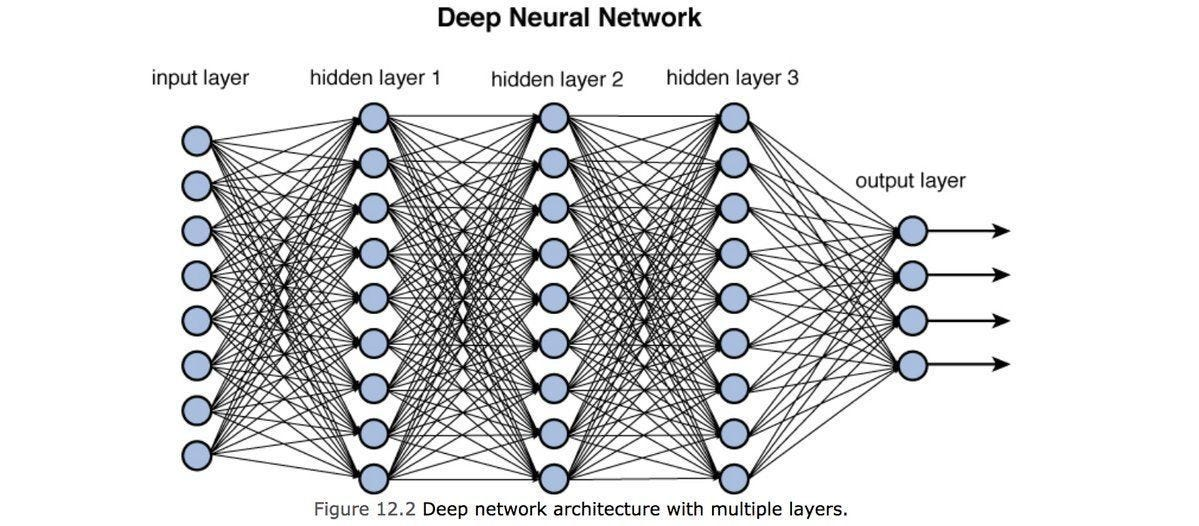

As you can see, we are now using many interconnected neurons to make stronger predictions.

**What Can Neural Networks Do?**
- Neural networks can be used for regression and classification. Like we saw with the single neuron models linear regression and logistic regression, Neural Networks can be incredibly effective in making both classification and regression predictions.
- Neural Netwoks do a really good job of finding the pattern even for complex data (Universal Approximation Thm.), but it is at risk of overfitting.

Because of this, it is important to avoid overfitting. One way of handling this is to, like we have previously, cross-validated our results with training and test datasets.

You can experiment with neural networks using [tensorflow playground](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.51829&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false).

Image source: [Towards Data Science](https://towardsdatascience.com/training-deep-neural-networks-9fdb1964b964)
***

## Implementing Deep Neural Networks:

***
**The Feedforward Phase:**
- Let $w_{i,j}^l$ be the weight from neuron j in layer $l-1$ to i in layer $l$ where W is the weight matrix.
- Let $b_i^l$ be the bias of neuron i in layer $l$.
- Given a pair $(\textbf{x}^{(i)}, \textbf{y}^{(i)})$ and a neural network with L hidden layers.
- Set $\textbf{a}^0 = \textbf{x}^{(i)}$.
- For $l = 1, 2, ..., L$ compute the preactivation for layer $l$ with $\textbf{z}^l = W^l \textbf{a}^{l-1}$ and then compite the post-activation for the same layer by passing the pre-activation to the selected function $\textbf{a}^l = \sigma (\textbf{z}^l)$.
- Finally, predict using $\hat{\mathbf{y}}^{(i)} = \textbf{a}^L$.

**Backpropogation Phase:**

We can use stochastic gradient descent!

- Initialize $\textbf{x}^{(i)}$, set $\textbf{a}^{0} = \textbf{x}^{(i)}$.
- Complete the feedforward phase such that for $l = 1, 2, ..., L$, we compute $\textbf{z}^l = W^l \textbf{a}^{l-1} + \textbf{b}^l$ and $\textbf{z}^l = W^l \textbf{a}^{l-1}$
- Find the error by taking the gradient of the cost function with respect to a and performing matrix multiplication on it and the derivative of $\sigma(\textbf{z}^l)$ to get:  $\delta^L = \nabla_\textbf{a} \otimes \sigma'(\textbf{z}^l)$
- Then we perform backpropogation by taking the output error and using it to compute the previous errors by taking $\delta^l$ = $((\textbf{w}^{l+1})^T \delta^{l+1}) \otimes \sigma'(\textbf{z}^l)$ giving us the errors in vectors.
- Finally, we update the gradient for $l = L, L-1, ... , 1$ we update the weights $w^l \leftarrow w^l - \alpha \delta^l (a^(l-1))^T$ and the bias $b^l \leftarrow b^l - \alpha \delta^l$.

Here is an illustration that demostrates how these phases interact:

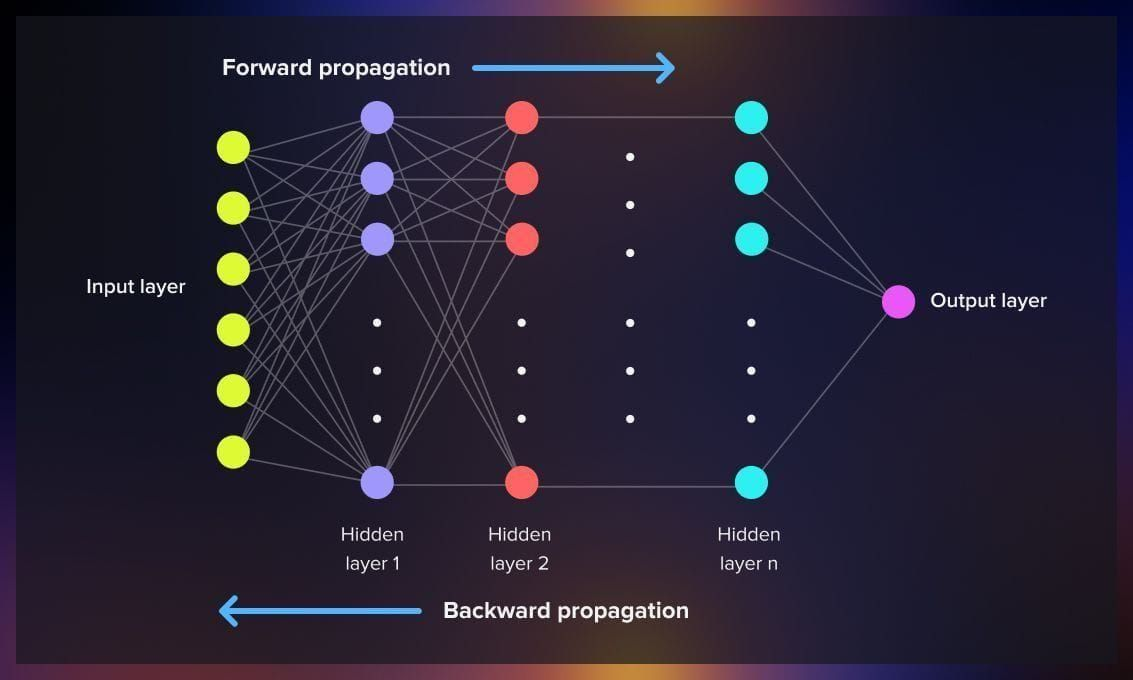

As you can see, forward propogation takes us through the neural network, while backpropogation takes the result of one epoch and learns based on the results.

Image source: [Serokell](https://serokell.io/blog/understanding-backpropagation)
***

## Regression with Deep Neural Networks:

***
Import the data and necessary modules.
***

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

soccer = pd.read_csv("soccer_stats.csv", encoding='ISO-8859-1', delimiter=';')

***
Prep the data.
***

In [2]:
# Filter the data such that we are only including players who have player more than 15 games worth of time.
data = soccer[soccer['90s'] >= 15.0]

# Selects shots as our predictor.
predictors = data[['Age', 'Starts', '90s', 'Shots', 'SoT', 'ShoDist', 'PKatt', 'Assists', 'PPA', 'SCA', 'GCA', 'ToAtt', 'Carries', 'CPA', 'Crs']]

# Now do the same for the goals.
y = data[['Goals']]

# Convert each to a numpy array.
y = y.values
x = predictors.values

# Split the data into training and testing sets.
train_p, test_p, train_r, test_r = train_test_split(x, y, test_size = 0.2, random_state = 42)


***
Create a keras model we will use to implement the nueral network.
***

In [3]:
# Create a keras model with 784, 60, 60, and 1 layers.
n_network = tf.keras.models.Sequential([
    tf.keras.layers.Dense(784, activation='relu', input_shape=(train_p.shape[1],)),
    tf.keras.layers.Dense(60, activation='relu'),
    tf.keras.layers.Dense(60, activation='relu'),
    tf.keras.layers.Dense(10)
])

# Compile the model using MSE as the cost function.
n_network.compile(optimizer='adam', loss='mean_squared_error',  metrics=['mae'])

***
Train the model.
***

In [4]:
# Get validation data for training.
train_p, val_p, train_r, val_r = train_test_split(train_p, train_r, test_size = 0.5, random_state = 42)

# Train the model.
fit_network = n_network.fit(train_p, train_r, epochs = 100, batch_size = 32, validation_data=(val_p, val_r), verbose = 0)


***
Get the model accuracy.
***

In [5]:
# Get the mse and mae values.
mse, mae = n_network.evaluate(train_p, train_r)

# Print the results.
print(f"The mse is: {mse}")
print(f"The mae is: {mae}")

8/8 [==============================] - 0s 2ms/step - loss: 1.4042 - mae: 0.8559
The mse is: 1.4041789770126343
The mae is: 0.8558825254440308


Thus far, our predictions are okay. We have a mse of 1.4, which is somewhat high for the number of goals players score, but it's outrageous. Also, our mae value means that our predictions, on average, are about 0.9 goals away from the players true number of goals they score.

***
Let's see if there is a significant difference for the test data.
***

In [6]:
# Get the mse and mae values.
mse, mae = n_network.evaluate(test_p, test_r)

# Print the results.
print(f"The mse is: {mse}")
print(f"The mae is: {mae}")

4/4 [==============================] - 0s 3ms/step - loss: 2.3957 - mae: 1.0692
The mse is: 2.3956661224365234
The mae is: 1.0691779851913452


This does a little bit worse. Is our data overfit? Our model seems to do okay, but can we do better?

***
Let's see if changing the number of epochs makes a difference.
***

In [7]:
epochs = [50, 100, 500, 1000, 5000]
train_mses = []
train_maes = []
test_mses = []
test_maes = []

for i in epochs:
  fit_new = n_network.fit(train_p, train_r, epochs = i, batch_size = 32, validation_data=(val_p, val_r), verbose = 0)
  train_mse, train_mae = n_network.evaluate(train_p, train_r)
  test_mse, test_mae = n_network.evaluate(test_p, test_r)
  train_mses.append(train_mse)
  train_maes.append(train_mae)
  test_mses.append(test_mse)
  test_maes.append(test_mae)

print(train_mses)
print(train_maes)
print(test_mses)
print(test_maes)


4/4 [==============================] - 0s 3ms/step - loss: 2.2904 - mae: 0.9970
[1.1569275856018066, 0.8178321719169617, 0.11825240403413773, 0.08576351404190063, 0.00022286595776677132]
[0.7545138597488403, 0.6337845325469971, 0.2643543779850006, 0.22672106325626373, 0.010392626747488976]
[1.7437034845352173, 1.657543420791626, 1.9935927391052246, 2.5862081050872803, 2.2903738021850586]
[0.917303740978241, 0.9028294086456299, 0.9572453498840332, 1.0896964073181152, 0.9970255494117737]


The 100 epoch model does the best on both test mae and test mse. It isn't the best for those categories on the training data, but it is pretty clear that those models are overfit. It turns out that maybe 100 epochs was a good intial choice.

***
What if we change the number of neurons?
***

In [10]:
# Create a keras model with 128, 64, 32, and 1 layers.
n_network = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(train_p.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model using MSE as the cost function.
n_network.compile(optimizer='adam', loss='mean_squared_error',  metrics=['mae'])

***
Get the training and test mses and maes now.
***

In [11]:
# Fit the new model.
fit_new = n_network.fit(train_p, train_r, epochs = 100, batch_size = 32, validation_data=(val_p, val_r), verbose = 0)

#Get the mse and mae for training and testing data.
train_mse, train_mae = n_network.evaluate(train_p, train_r)
test_mse, test_mae = n_network.evaluate(test_p, test_r)

# Print the results.
print(f"Train Mse: {train_mse}")
print(f"Train Mae: {train_mae}")
print(f"Test Mse: {test_mse}")
print(f"Test Mae: {test_mae}")

4/4 [==============================] - 0s 4ms/step - loss: 2.3837 - mae: 1.1162
Train Mse: 1.295353651046753
Train Mae: 0.8296603560447693
Test Mse: 2.3837122917175293
Test Mae: 1.1162105798721313


These actually do a little worse. In order to find better results, we would have to try more variations.

## Conclusion:

***
- Flexibility: Neural networks offer a highly flexible framework for modeling complex relationships in data, making them suitable for a wide range of tasks in machine learning and artificial intelligence.

- Representation Learning: Through the hierarchical arrangement of layers and non-linear activation functions, neural networks can automatically learn meaningful representations from raw data, allowing them to capture intricate patterns and features.

- Computational Intensity: Training large neural networks with extensive datasets can be computationally intensive and may require significant computational resources (my computer definitely got warm!)

- Interpretability: Despite their impressive performance, neural networks often lack interpretability, making it challenging to understand the underlying mechanisms driving their predictions. Techniques such as feature importance analysis and visualization can help enhance interpretability but may not fully address the issue.

- Overfitting: Neural networks are prone to overfitting, especially when dealing with limited data or overly complex architectures.

- Hyperparameter Tuning: Neural networks involve a large number of hyperparameters, including the number of layers, neurons per layer, learning rate, activation functions, etc. Tuning these hyperparameters effectively is crucial for achieving optimal performance and avoiding issues such as underfitting or overfitting.
***